In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files
uploaded = files.upload()

Saving elezioni_2024_v3.xlsx to elezioni_2024_v3.xlsx


In [2]:
df =pd.read_excel("elezioni_2024_v3.xlsx")
df['anno'] = df['anno_tmp'].apply(lambda x: x + 1900 if x > 8 else x + 2000)

# Calcola la colonna 'età' sapendo che siamo nel 2024
df['età'] = 2024 - df['anno']

Media voto per sesso:
sesso
F    0.620253
M    0.536585
Name: voto, dtype: float64

Media voto per età:
età
18     1.000000
19     0.500000
20     0.750000
21     0.000000
22     0.333333
         ...   
92     1.000000
93     0.000000
95     0.000000
97     0.000000
101    0.000000
Name: voto, Length: 78, dtype: float64


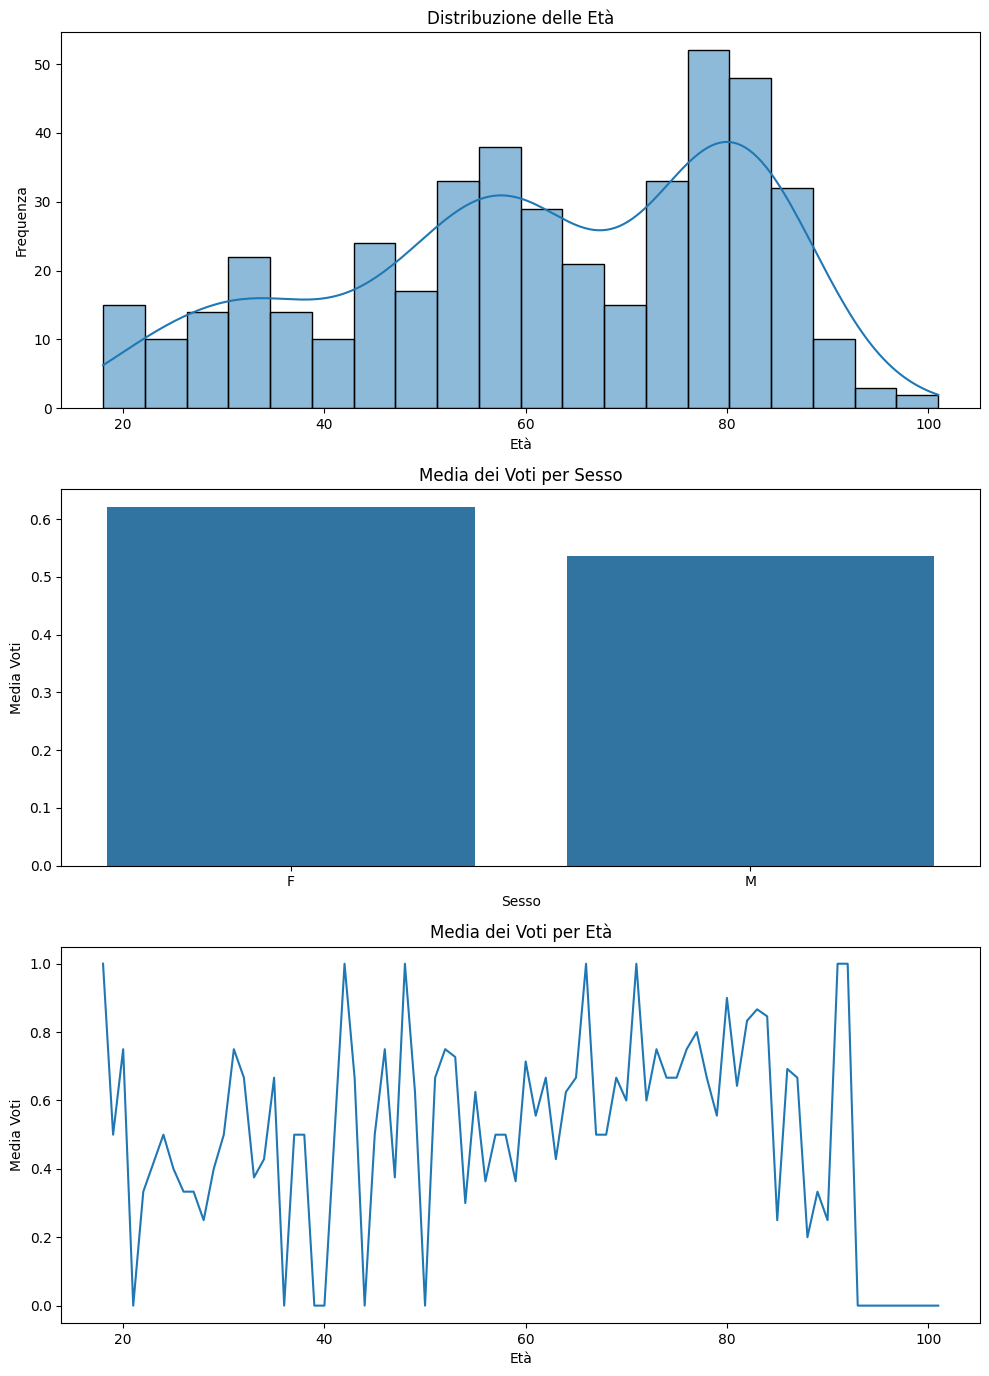

In [3]:


# Calcola alcune statistiche
mean_voto_per_sesso = df.groupby('sesso')['voto'].mean()
mean_voto_per_eta = df.groupby('età')['voto'].mean()

print("Media voto per sesso:")
print(mean_voto_per_sesso)

print("\nMedia voto per età:")
print(mean_voto_per_eta)

# Creare grafici statici con Matplotlib e Seaborn
plt.figure(figsize=(10, 18))

# Grafico della distribuzione delle età
plt.subplot(4, 1, 1)
sns.histplot(df['età'], bins=20, kde=True)
plt.title('Distribuzione delle Età')
plt.xlabel('Età')
plt.ylabel('Frequenza')

# Grafico della media dei voti per sesso
plt.subplot(4, 1, 2)
sns.barplot(x=mean_voto_per_sesso.index, y=mean_voto_per_sesso.values)
plt.title('Media dei Voti per Sesso')
plt.xlabel('Sesso')
plt.ylabel('Media Voti')

# Grafico della media dei voti per età
plt.subplot(4, 1, 3)
sns.lineplot(x=mean_voto_per_eta.index, y=mean_voto_per_eta.values)
plt.title('Media dei Voti per Età')
plt.xlabel('Età')
plt.ylabel('Media Voti')

plt.tight_layout()
plt.show()


# Creare un grafico interattivo per fasce di età e sesso con Plotly
# Aggiungiamo una colonna per le fasce di età
bins = [18, 30, 40, 50, 60, 70, 80, 90, 110]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-110']
df['fascia_età'] = pd.cut(df['età'], bins=bins, labels=labels, right=False)

# Creare il grafico interattivo con colori personalizzati
fig = px.histogram(df, x='fascia_età', color='sesso', barmode='group',
                   title='Distribuzione per Fasce di Età e Sesso',
                   labels={'fascia_età': 'Fascia di Età', 'count': 'Conteggio'},
                   category_orders={'fascia_età': labels},
                   color_discrete_map={'F': 'pink', 'M': 'blue'})

fig.update_layout(
    xaxis_title='Fascia di Età',
    yaxis_title='Conteggio',
    bargap=0.2,
)

fig.show()

# Creare il grafico interattivo con percentuali
# Calcolare le percentuali
df_percent = df.groupby(['fascia_età', 'sesso']).size().reset_index(name='count')
df_total = df.groupby('fascia_età').size().reset_index(name='total')
df_percent = pd.merge(df_percent, df_total, on='fascia_età')
df_percent['percent'] = df_percent['count'] / df_percent['total'] * 100

fig_percent = px.bar(df_percent, x='fascia_età', y='percent', color='sesso', barmode='group',
                     title='Distribuzione Percentuale per Fasce di Età e Sesso',
                     labels={'fascia_età': 'Fascia di Età', 'percent': 'Percentuale'},
                     category_orders={'fascia_età': labels},
                     color_discrete_map={'F': 'pink', 'M': 'blue'})

fig_percent.update_layout(
    xaxis_title='Fascia di Età',
    yaxis_title='Percentuale',
    bargap=0.2,
)

fig_percent.show()

# Creare i grafici per "votato" e "non votato"
fig_voto = px.histogram(df, x='voto', color='voto', barmode='group',
                        title='Distribuzione dei Voti (Votato vs Non Votato)',
                        labels={'voto': 'Voto', 'count': 'Conteggio'},
                        color_discrete_map={1: 'green', 0: 'red'})

fig_voto.update_layout(
    xaxis_title='Voto',
    yaxis_title='Conteggio',
    bargap=0.2,
)

fig_voto.show()

# Creare il grafico interattivo per "votato" e "non votato" per sesso
fig_voto_sesso = px.histogram(df, x='sesso', color='voto', barmode='group',
                              title='Distribuzione dei Voti per Sesso (Votato vs Non Votato)',
                              labels={'sesso': 'Sesso', 'count': 'Conteggio'},
                              color_discrete_map={1: 'green', 0: 'red'})

fig_voto_sesso.update_layout(
    xaxis_title='Sesso',
    yaxis_title='Conteggio',
    bargap=0.2,
)
fig_voto_sesso.show()

# Creare il grafico interattivo per "votato" e "non votato" per fasce di età
df_votanti = df[df['età'] >= 18]  # Considera solo le persone con età >= 18
fig_voto_fasce = px.histogram(df_votanti, x='fascia_età', color='voto', barmode='group',
                              title='Distribuzione dei Voti per Fasce di Età (Votato vs Non Votato)',
                              labels={'fascia_età': 'Fascia di Età', 'count': 'Conteggio'},
                              category_orders={'fascia_età': labels},
                              color_discrete_map={1: 'green', 0: 'red'})

fig_voto_fasce.update_layout(
    xaxis_title='Fascia di Età',
    yaxis_title='Conteggio',
    bargap=0.2,
)

fig_voto_fasce.show()

# Creare il grafico interattivo percentuale per "votato" e "non votato" per fasce di età
df_voto_percent = df_votanti.groupby(['fascia_età', 'voto']).size().reset_index(name='count')
df_total_fasce = df_votanti.groupby('fascia_età').size().reset_index(name='total')
df_voto_percent = pd.merge(df_voto_percent, df_total_fasce, on='fascia_età')
df_voto_percent['percent'] = df_voto_percent['count'] / df_voto_percent['total'] * 100

fig_voto_percent = px.bar(df_voto_percent, x='fascia_età', y='percent', color='voto', barmode='group',
                          title='Distribuzione Percentuale dei Voti per Fasce di Età (Votato vs Non Votato)',
                          labels={'fascia_età': 'Fascia di Età', 'percent': 'Percentuale'},
                          category_orders={'fascia_età': labels},
                          color_discrete_map={1: 'green', 0: 'red'})

fig_voto_percent.update_layout(
    xaxis_title='Fascia di Età',
    yaxis_title='Percentuale',
    bargap=0.2,
)

fig_voto_percent.show()

# Creare grafici a torta per fascia di età (totale)
fig_pie_età_totali = px.pie(df, names='fascia_età', title='Distribuzione Totale per Fascia di Età',
                            category_orders={'fascia_età': labels})

fig_pie_età_totali.show()

# Creare grafici a torta per fascia di età (votanti)
fig_pie_età_votanti = px.pie(df[df['voto'] == 1], names='fascia_età', title='Distribuzione dei Votanti per Fascia di Età',
                             category_orders={'fascia_età': labels})

fig_pie_età_votanti.show()

# Creare grafici a torta per sesso (totale)
fig_pie_sesso_totali = px.pie(df, names='sesso', title='Distribuzione Totale per Sesso',
                              color_discrete_map={'F': 'pink', 'M': 'blue'})

fig_pie_sesso_totali.show()

# Creare grafici a torta per sesso (votanti)
fig_pie_sesso_votanti = px.pie(df[df['voto'] == 1], names='sesso', title='Distribuzione dei Votanti per Sesso',
                               color_discrete_map={'F': 'pink', 'M': 'blue'})

fig_pie_sesso_votanti.show()

